In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pwd

/content


In [4]:
%cd 'drive/My Drive'

/content/drive/My Drive


In [5]:
ls

'Colab Notebooks'/   dataset/   'How to get started with Drive.pdf'
 Data/               dataset2/


In [6]:
%cd 'Data'

/content/drive/My Drive/Data


In [7]:
ls

'Data visualizations and prediction of wine type.ipynb'   test.csv
'model building.ipynb'                                    train.csv
 Review_analysis.ipynb                                    Untitled.ipynb


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('train.csv')

In [11]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [96]:
df['review_description'][2]

'Barolo Conca opens with inky dark concentration and soothing aromas of black fruit, spice, cola, plum, prune and dried lavender buds. The nose presents those ethereal and delicate aromas, but in the mouth, it delivers thicker flavors of chocolate and mocha. Drink after 2018.'

In [0]:
import re 

In [0]:
import nltk

In [16]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer 

In [0]:
# Initialize empty array 
# to append clean text  
corpus = []

In [0]:
#  82567 rows to clean 
for i in range(0, 82657):  
      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', df['review_description'][i])  
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(review)

In [0]:
from wordcloud import WordCloud, STOPWORDS 

In [0]:
from PIL import Image

In [33]:
#let us combine all the words from our corpus and build a wordcloud to see the frequencey of words
text = " ".join(review for review in corpus)
print ("There are {} words in the combination of all review.".format(len(text)))


There are 12992958 words in the combination of all review.


In [0]:
#let us remove the stop words related to wine context
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

In [0]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

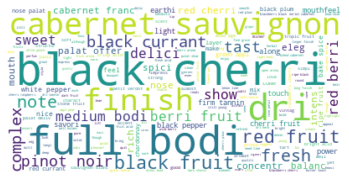

In [36]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that most of them mentioned about cabernet Sauvignon pinot noir, black cherry, red berry,black currant,red fruit, fresh,full bodied.

In [0]:
#let us take our data and divide our wine into ratings based upon the points given by the users

def points_to_class(points):
    if points in range(79,83):
        return 1
    elif points in range(83,87):
        return 2
    elif points in range(87,90):
        return 3
    elif points in range(90,94):
        return 4
    elif points in range(94,101):
        return 5
    
df["rating"] = df["points"].apply(points_to_class)


In [40]:
df["rating"].head()

0    2
1    3
2    5
3    3
4    3
Name: rating, dtype: int64

In [0]:
#let us take Class 1 which contains least rated wines and see what peopl are saying about it
class_1_reviews = pd.DataFrame(df[(df['rating'] == 1)])['review_description']

In [72]:
text = " ".join(review for review in class_1_reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 299492 words in the combination of all review.


In [0]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

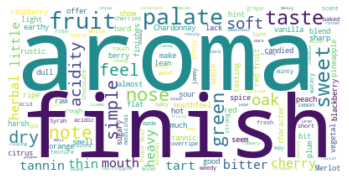

In [74]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The low rated wines have reviews about aroma, finish, fruit, palate and taste the most.

so, those wines might have to be improved in terms of the above factors.

In [0]:
#let us take Class 2 which contains 2nd least rated wines and see what people are saying about it
class_2_reviews = pd.DataFrame(df[(df['rating'] == 2)])['review_description']

In [77]:
text = " ".join(review for review in class_2_reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3975570 words in the combination of all review.


In [0]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

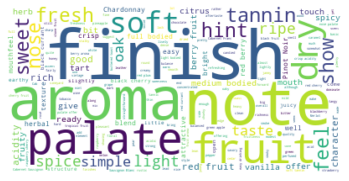

In [79]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The wines belonging to the 2nd least rated also says more about finish, aroma, palate, dry, fruit, soft, tannin, simple, sweet etc


In [0]:
#let us take Class 3 which contains average rated wines and see what people are saying about it
class_3_reviews = pd.DataFrame(df[(df['rating'] == 3)])['review_description']

In [81]:
text = " ".join(review for review in class_3_reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6649141 words in the combination of all review.


In [0]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

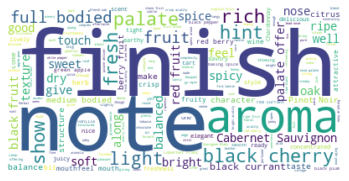

In [83]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The average rated wines might have good finish, note, aroma and rich in taste.

In [0]:
#let us take Class 4 which contains second high rated wines and see what people are saying about it
class_4_reviews = pd.DataFrame(df[(df['rating'] == 4)])['review_description']

In [86]:
text = " ".join(review for review in class_4_reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 7806209 words in the combination of all review.


In [0]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

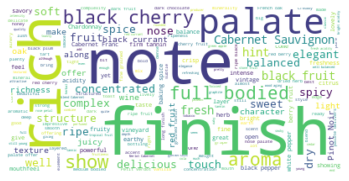

In [88]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see the second class wines are rich in taste and have good finish and mostly contain black cherry.

This is a good indication that black cherry makes the people more favourable towards those wines

In [0]:
#let us take Class 5 which contains top rated wines and see what people are saying about it
class_5_reviews = pd.DataFrame(df[(df['rating'] == 5)])['review_description']

In [91]:
text = " ".join(review for review in class_5_reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1453006 words in the combination of all review.


In [0]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

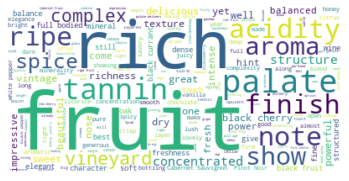

In [93]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From this we can see that the top rated wines are rich in quality and the fruit used has significant importance as well.

Moreover, it also talks about ripe and vineyard which can be an important factor for producing wines.

Also they talk about how balance is maintaines in the content used.

This is all about the wine reviews based upon the rating received.


**The summary for each class of wine is :**

Class 1:Aroma,Finish,taste,sweet,soft

Class 2:Finish,Aroma,hint, tannin

Class 3:Note,Full bodied, Finish, Note

Class 4:Rich, Note, Finish, palate.

Class 5:Rich, Fruit, Tannin, palate,vineyard,palate,spice etc

The overall Summary of words is
{Aroma, Finish, taste, Sweet, soft, hint, tannin, palate, Full bodied,balanced,tannin,Rich}
